In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors 
import random
state_number_map = {'failed':0, 'successful':1, 'live':2, 'suspended':3, 'canceled':4, 'undefined':5}

In [2]:
!ls

Capstone_1.ipynb      cp1.py		ks-projects-201612.csv
Capstone_1.md	      FandVSubcats.png	ks-projects-201801.csv
Categories_Hbars.png  images


In [91]:
#early_csv = pd.read_csv('ks-projects-201612.csv',header = 0)
late_csv = pd.read_csv('ks-projects-201801.csv')

In [105]:
late_csv['launched'] = pd.to_datetime(late_csv['launched'])
late_csv['deadline'] = pd.to_datetime(late_csv['deadline'])
set(late_csv['state'].values)
#late_csv['state'] = late_csv['state'].map(state_number_map)
lengths = late_csv['deadline'] - late_csv['launched']
late_csv['length'] = lengths
late_csv.dropna(inplace=True)

In [5]:
late_csv.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,4,14,US,1283.0,1283.0,19500.00,55 days 15:24:57


In [6]:
late_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   ID                378661 non-null  int64          
 1   name              378657 non-null  object         
 2   category          378661 non-null  object         
 3   main_category     378661 non-null  object         
 4   currency          378661 non-null  object         
 5   deadline          378661 non-null  datetime64[ns] 
 6   goal              378661 non-null  float64        
 7   launched          378661 non-null  datetime64[ns] 
 8   pledged           378661 non-null  float64        
 9   state             378661 non-null  int64          
 10  backers           378661 non-null  int64          
 11  country           378661 non-null  object         
 12  usd pledged       374864 non-null  float64        
 13  usd_pledged_real  378661 non-null  float64  

In [7]:
late_csv.describe()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,length
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661
mean,1.074731e+09,4.908079e+04,9.682979e+03,0.839849,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,33 days 21:58:10.533968344
std,6.190862e+08,1.183391e+06,9.563601e+04,1.263174,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,65 days 21:55:09.506515067
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0 days 00:07:17
25%,5.382635e+08,2.000000e+03,3.000000e+01,0.000000,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,29 days 02:20:36
50%,1.075276e+09,5.200000e+03,6.200000e+02,0.000000,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,29 days 16:32:32
75%,1.610149e+09,1.600000e+04,4.076000e+03,1.000000,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,36 days 15:35:44
max,2.147476e+09,1.000000e+08,2.033899e+07,5.000000,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,16738 days 23:00:00


In [150]:
late_csv.iloc[late_csv['length'].argmax()]

ID                                      69489148
name                Student Auditions Music 2015
category                              Publishing
main_category                         Publishing
currency                                     CHF
deadline                     2015-10-31 00:00:00
goal                                        1900
launched                     1970-01-01 01:00:00
pledged                                        0
state                                  suspended
backers                                        0
country                                       CH
usd pledged                                    0
usd_pledged_real                               0
usd_goal_real                            1905.97
length                       16738 days 23:00:00
Name: 319002, dtype: object

In [82]:
def make_hist(x, ax, label=None, orientation='vertical', alpha = .7):
    r = random.random()
    g = random.random()
    b = random.random()
    ax.hist(x, alpha = alpha, color = (r,g,b), orientation = orientation)
    ax.set_title(label)
    #ax.set_xlabel(x)
    #plt.tight_layout()
    #plt.show()

def subtable(category):
    df = late_csv[late_csv['main_category'] == category]
    return df


def bootstrap(samp, num_bs_sam = 10000):
    bs = []
    
    for _ in range(num_bs_sam):
        bs.append(np.random.choice(samp, size = len(samp)))
        
    return bs

def bootstrap_ci(sample, stat_function=np.mean, num_resamp = 10000, ci = .95):
    bs = bootstrap(sample, num_resamp)
    
    stat_list = []
    
    for row in range(len(bs)):
        stat_list.append(np.percentile(stat_function(bs[row]),ci))
        #print(row)
    
    return np.percentile(sample,ci), stat_list

def series_norm(series):
    return (series - series.mean()) / (series.max() - series.min())

In [10]:
cats = list(set(late_csv['main_category']))
sub_cats = (set(late_csv['category']))

In [11]:
late_csv.corr()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.001433,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.001122,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.015537,0.717079,0.857370,0.952843,0.005024
state,0.001433,0.001122,0.015537,1.000000,0.015579,0.015611,0.014774,-0.000111
backers,0.000654,0.004012,0.717079,0.015579,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.015611,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.014774,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,-0.000111,0.004517,0.006172,0.005596,1.000000


In [83]:
currencies = late_csv['currency'].value_counts()
normed_currency = series_norm(currencies)
#currencies

In [147]:
q1 = late_csv['backers'].quantile(.25)
q3 = late_csv['backers'].quantile(.75)
iqr = q3 - q1
#late_csv[late_csv['backers'] > np.percentile(late_csv['backers'],99.99)]
no_backers = late_csv[late_csv['backers'] == 0]
no_backers.iloc[no_backers['goal'].idxmax()]

ID                                           301194452
name                Local Men's Entertainment Magazine
category                                   Periodicals
main_category                               Publishing
currency                                           USD
deadline                           2011-11-02 00:00:00
goal                                             55300
launched                           2011-09-26 07:28:28
pledged                                              0
state                                           failed
backers                                              0
country                                             US
usd pledged                                          0
usd_pledged_real                                     0
usd_goal_real                                    55300
length                                36 days 16:31:32
Name: 242078, dtype: object

In [ ]:
num_cats = ['goal', 'pledged', 'backers']
for cat in num_cats:
    fig, ax = plt.subplots()
    ax.boxplot(late_csv[cat])

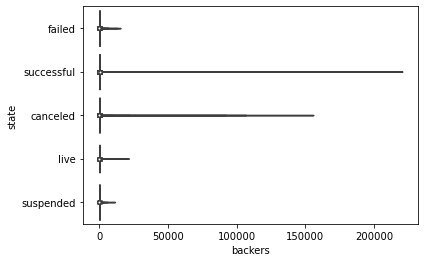

In [109]:
for category in cats:
    table = subtable(category)
    sns.violinplot(y = table['state'], x = table['backers'], orient = 'h')
    

In [89]:
late_csv.corrwith(late_csv['usd_pledged_real'])

ID                 -0.000025
goal                0.005104
pledged             0.952843
state               0.014774
backers             0.752539
usd pledged         0.907743
usd_pledged_real    1.000000
usd_goal_real       0.005596
dtype: float64

In [12]:
av_pledge = late_csv.groupby('main_category')


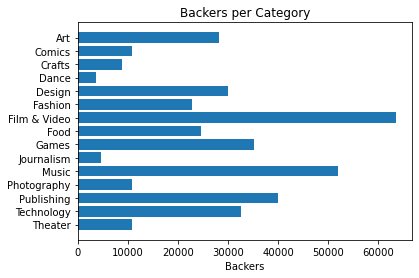

In [13]:
backers_counts = av_pledge['backers'].count()
fig, ax = plt.subplots()
ax.barh(backers_counts.keys(),backers_counts.values)
ax.invert_yaxis()
ax.set_xlabel('Backers')
ax.set_title('Backers per Category')
plt.savefig('Categories_Hbars')

(array([197719.,      0., 133956.,      0.,   2799.,      0.,   1846.,
             0.,  38779.,   3562.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

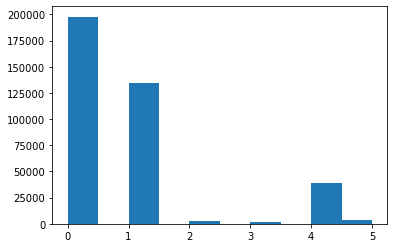

In [14]:
fig, ax = plt.subplots()
ax.hist(late_csv['state'])

In [15]:
f_and_v = subtable('Film & Video')
f_and_v.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,length
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,US,100.00,2421.00,30000.00,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,US,220.00,220.00,45000.00,44 days 23:39:10
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,4,14,US,1283.00,1283.00,19500.00,55 days 15:24:57
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,4,43,US,6240.57,6240.57,65000.00,29 days 02:04:12
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,1,571,CA,43203.25,42174.03,15313.04,29 days 05:58:00


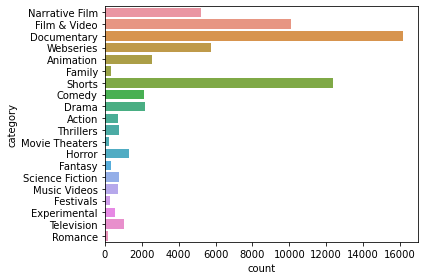

In [16]:
fig, ax = plt.subplots()

#distro = stats.norm.pdf() (f_and_v['usd_goal_real'].mean())

#x = np.arange(start = min(f_and_v['usd_goal_real']), stop = max(f_and_v['usd_goal_real']))

sns.countplot( y = f_and_v['category'])
plt.tight_layout()
#plt.savefig('FandVSubcats', transparent = False)

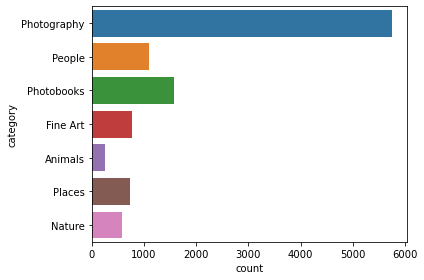

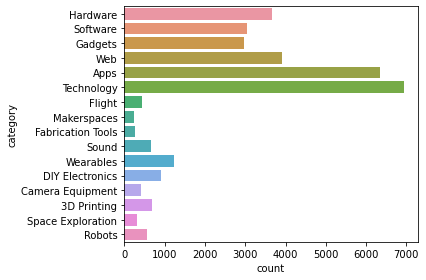

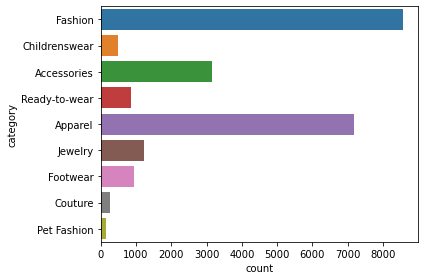

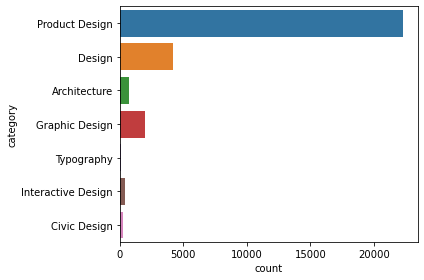

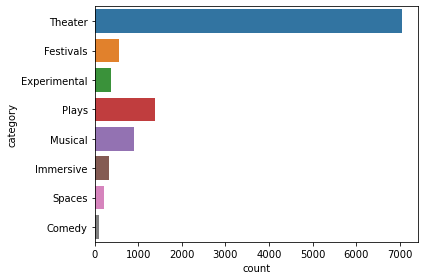

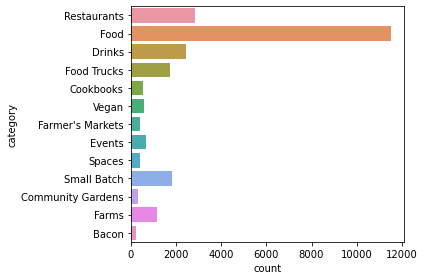

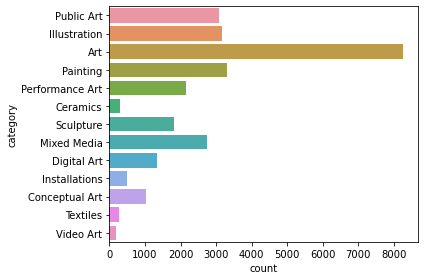

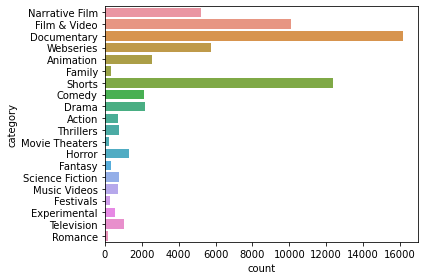

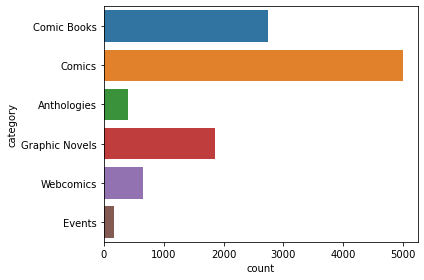

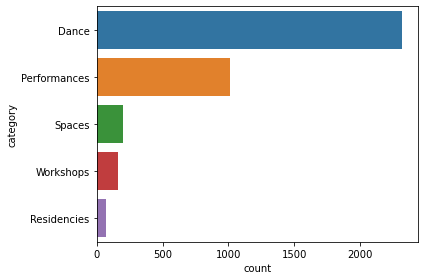

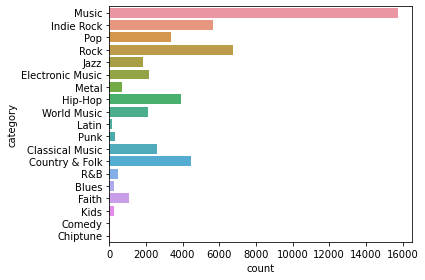

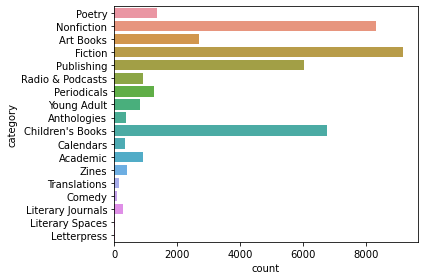

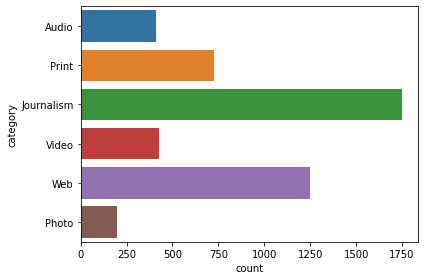

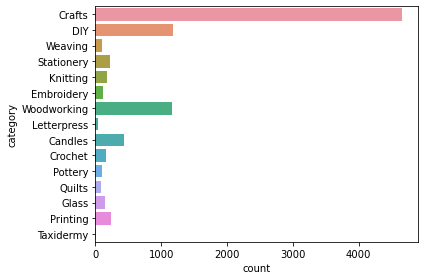

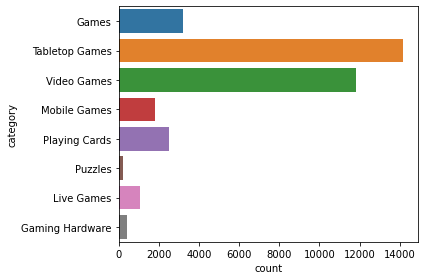

In [17]:
#fig, ax = plt.subplots()
for category in cats:
    fig, ax = plt.subplots()
    table = subtable(category)
    sns.countplot(y=table['category'], label = category)
    plt.tight_layout()
    #plt.savefig(f'images/{category}', transparent = False, bbox_inches = 'tight')

<AxesSubplot:>

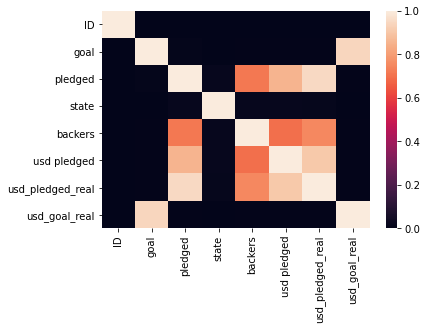

In [18]:
sns.heatmap(late_csv.corr())

In [19]:
pledge_means = []
for category in cats:
    pledge_means.append((category, subtable(category)['pledged'].mean()) )

In [20]:
success_count = []
norm_success_count = []
for category in cats:
    table = subtable(category)
    success_count.append((category, table['state'].value_counts(sort = False)) ) 
    norm_success_count.append((category, table['state'].value_counts(normalize = True, sort = False)) ) 
#type(norm_success_count[0])

In [21]:
#norm_success_count[0][1].

In [22]:
# for tup in norm_success_count:
#     fig, ax = plt.subplots(1,1)
#     tup[1].sort_index().hist()

In [23]:
stats.ttest_ind(f_and_v['pledged'], subtable('Music')['pledged'], equal_var=False)

Ttest_indResult(statistic=13.185357414094302, pvalue=1.171290168905077e-39)

In [24]:
fv_bs_mean = bootstrap_ci(f_and_v['pledged'])
mus_bs_mean = bootstrap_ci(subtable('Music')['pledged'])

Ttest_indResult(statistic=1322.4341204464542, pvalue=0.0)

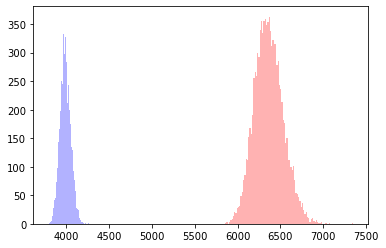

In [25]:
fig, ax = plt.subplots()
ax.hist(fv_bs_mean[1], bins = 100, alpha = .3, color = 'r')
ax.hist(mus_bs_mean[1], bins = 100, alpha = .3, color = 'b')
# Music projects will gather less on average than Film & Video
stats.ttest_ind(fv_bs_mean[1],mus_bs_mean[1], equal_var = False)

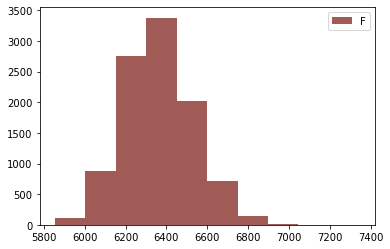

In [26]:
fig, ax = plt.subplots()
make_hist(fv_bs_mean[1], ax, 'Film & Video Bootstrapped Mean')

Photography mean against Photography mean
Ttest_indResult(statistic=0.0, pvalue=1.0)
Photography mean against Technology mean
Ttest_indResult(statistic=-24.36061746140475, pvalue=4.929332769883506e-130)
Photography mean against Fashion mean
Ttest_indResult(statistic=-8.688018734788363, pvalue=3.8520007389374846e-18)
Photography mean against Design mean
Ttest_indResult(statistic=-17.63527307491767, pvalue=2.8586704887369566e-69)
Photography mean against Theater mean
Ttest_indResult(statistic=-1.9542981420324734, pvalue=0.050681862892077253)
Photography mean against Food mean
Ttest_indResult(statistic=-5.951572582777881, pvalue=2.6835331771959436e-09)
Photography mean against Art mean
Ttest_indResult(statistic=0.21390493555777396, pvalue=0.8306225889088136)
Photography mean against Film & Video mean
Ttest_indResult(statistic=-10.609252567651435, pvalue=2.9941684595749975e-26)
Photography mean against Comics mean
Ttest_indResult(statistic=-10.363443863190232, pvalue=4.200244425940201e-25)

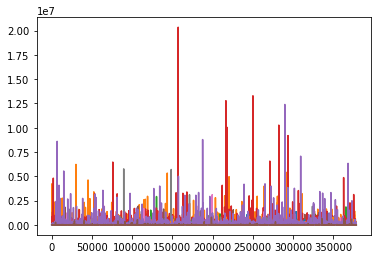

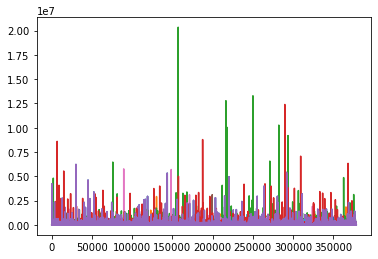

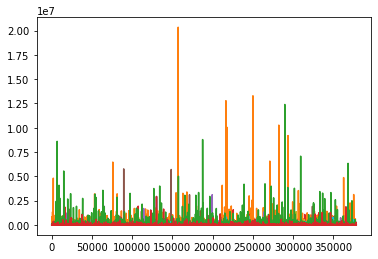

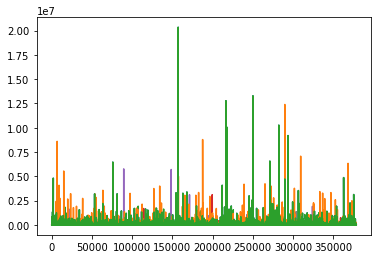

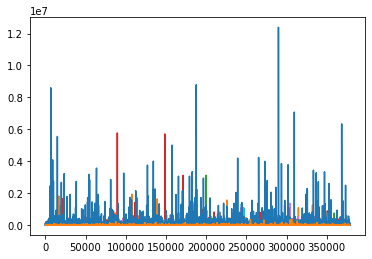

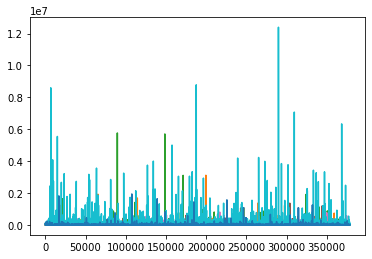

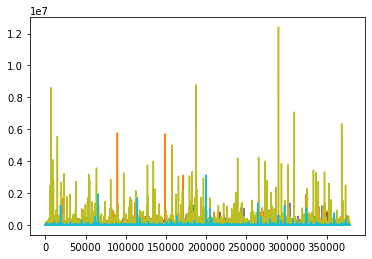

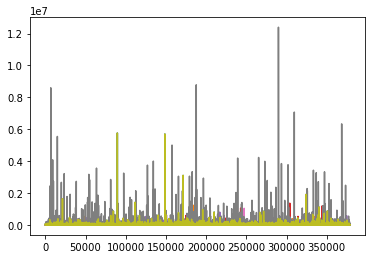

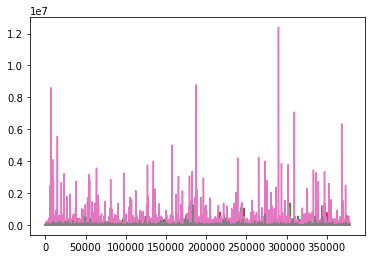

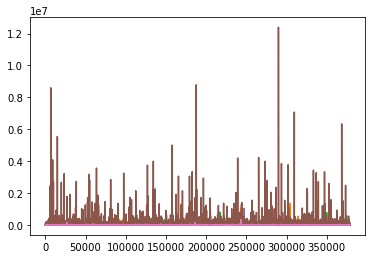

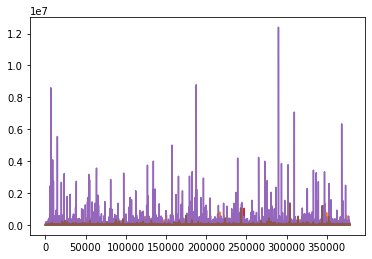

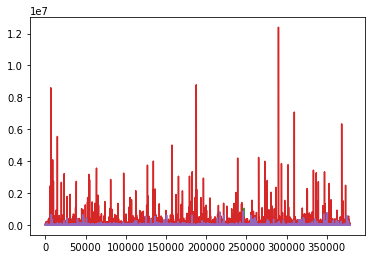

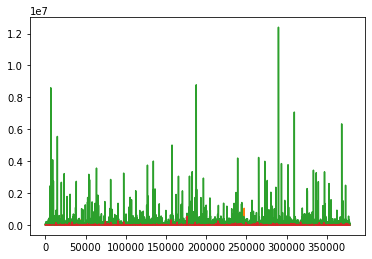

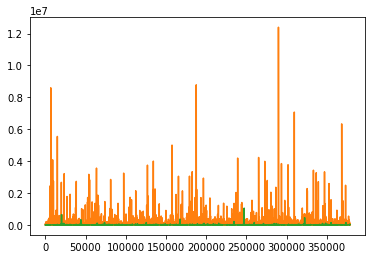

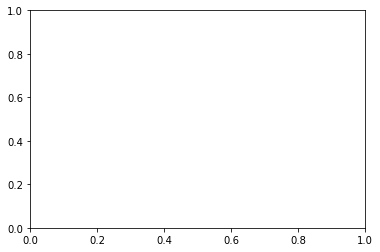

In [49]:
# fig, ax = plt.subplots()

# for idx, category in enumerate(cats[:-1]):
    
#     first_set = subtable(category)['pledged']
#     norm_one = (first_set - first_set.mean()) / (first_set.max() - first_set.min())
    
#     title = category
#     for cat_two in cats[idx:]:
        
#         second_set = subtable(cat_two)['pledged']
#         norm_two = (second_set - second_set.mean()) / (second_set.max() - second_set.min())
        
#         print(f'{category} mean against {cat_two} mean')
#         print(stats.ttest_ind(first_set, second_set, equal_var=False))
        
#         title += f' against {cat_two}'
#         second_set.plot()
        
#         title = category
    
#     first_set.plot()#make_hist(first_set, ax)
    
#     fig, ax = plt.subplots()